# 逻辑回归预测芯片质量

## 任务：
- 1.基于chip_test.csv数据，建立逻辑回归模型（二阶边界），评估模型表现；
- 2.以函数的方式求解边界曲线 
- 3.描绘出完整的决策边界曲线

In [98]:
import pandas as pd 
import numpy as np 
data =pd.read_csv('chip_test.csv')
data.head()


,test1,test2,pass
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,0.183760,0.93348,0


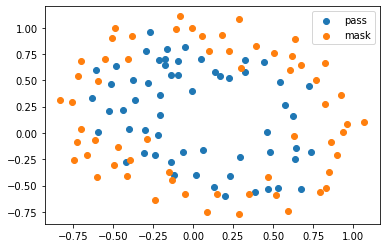

In [99]:


isPass = data.loc[:,'pass']==1
from matplotlib import pyplot as plt
test1_pass,test2_pass = data.loc[:,'test1'][isPass],data.loc[:,'test2'][isPass]
test1_mask,test2_mask = data.loc[:,'test1'][~isPass],data.loc[:,'test2'][~isPass]
plt.figure()
data_pass = plt.scatter(test1_pass,test2_pass)
data_mask = plt.scatter(test1_mask,test2_mask)

plt.legend((data_pass,data_mask),('pass','mask'))
plt.show()


In [100]:

x1 = data.loc[:,'test1']
x2 = data.loc[:,'test2']
x1_2 = x1**2
x2_2 = x2**2
x1_x2 = x1*x2
# print(x1_2,x1_x2)
x_new = {'x1':x1,'x2':x2,'x1_2':x1_2,'x2_2':x2_2,'x1_x2':x1_x2}
x_new = pd.DataFrame(x_new)
print(x_new)

           x1        x2      x1_2      x2_2     x1_x2
0    0.051267  0.699560  0.002628  0.489384  0.035864
1   -0.092742  0.684940  0.008601  0.469143 -0.063523
2   -0.213710  0.692250  0.045672  0.479210 -0.147941
3   -0.375000  0.502190  0.140625  0.252195 -0.188321
4    0.183760  0.933480  0.033768  0.871385  0.171536
..        ...       ...       ...       ...       ...
113 -0.720620  0.538740  0.519293  0.290241 -0.388227
114 -0.593890  0.494880  0.352705  0.244906 -0.293904
115 -0.484450  0.999270  0.234692  0.998541 -0.484096
116 -0.006336  0.999270  0.000040  0.998541 -0.006332
117  0.632650 -0.030612  0.400246  0.000937 -0.019367

[118 rows x 5 columns]


In [101]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_new,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
from sklearn.metrics import accuracy_score
y_predict = LR.predict(x_new)
print(y_predict)
accuracy = accuracy_score(y,y_predict)
print(accuracy)

[1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 1 0 0 1]
0.8135593220338984


In [103]:
y_predict  = LR.predict(x_new)
accuracy2 = accuracy_score(y,y_predict)
# print(accuracy2)
intercept = LR.intercept_[0]
thita = (LR.coef_)[0]
x1_new = x1.sort_values()
# x1_new = x1.sort_values()
# print(data_exam1_sort,data_exam1)
a = thita[3]
b = thita[4]*x1_new+thita[1]
c = intercept+thita[0]*x1_new+thita[2]*x1_new**2 
# print(a,b,c)
x2_new_boundary = (-b+np.sqrt(b*b-4*a*c))/(2*a)

print(x1_new)

112   -0.83007
86    -0.75518
84    -0.74366
111   -0.72638
113   -0.72062
        ...   
70     0.89804
65     0.92684
68     0.93836
67     0.96141
101    1.07090
Name: test1, Length: 118, dtype: float64


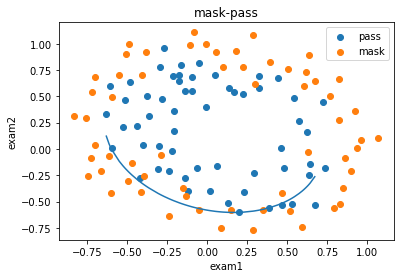

In [104]:
fig4 =plt.figure()
test1_pass,test2_pass = data.loc[:,'test1'][isPass],data.loc[:,'test2'][isPass]
test1_mask,test2_mask = data.loc[:,'test1'][~isPass],data.loc[:,'test2'][~isPass]
plt.title('mask-pass')
data_pass = plt.scatter(test1_pass,test2_pass)
data_mask = plt.scatter(test1_mask,test2_mask)
plt.xlabel('exam1')
plt.ylabel('exam2')
plt.legend((data_pass,data_mask),('pass','mask'))
plt.plot(x1_new,x2_new_boundary)
plt.show()

In [105]:
def f(x1_new):
    a = thita[3]
    b = thita[4]*x1_new+thita[1]
    c = intercept+thita[0]*x1_new+thita[2]*x1_new**2 
# print(a,b,c)
    x2_new_boundary1 = (-b+np.sqrt(b*b-4*a*c))/(2*a)
    x2_new_boundary2 = (-b-np.sqrt(b*b-4*a*c))/(2*a)
    return x2_new_boundary1,x2_new_boundary2

x2_new_boundary1 = []
x2_new_boundary2 = []
for x in x1_new:
    x2_new_boundary1.append(f(x)[0])
    x2_new_boundary2.append(f(x)[1])
print(x2_new_boundary1,x2_new_boundary2)

[nan, nan, nan, nan, nan, nan, nan, nan, 0.1212616968890662, 0.0467944820095965, 0.026979354078540074, 0.008721893365933472, -0.008305762351396568, -0.008305762351396568, -0.11718731344060693, -0.16040223615173616, -0.18016521095735055, -0.18965257864796897, -0.2167100408666948, -0.22530078461574718, -0.23369451964444551, -0.24992610329706427, -0.28761582556375753, -0.3084684882431942, -0.3217191925848816, -0.3281610359163861, -0.33448523405683533, -0.34069504837495407, -0.35278364688732466, -0.35866807156821046, -0.37013014052537174, -0.42186136568917443, -0.4265659425169493, -0.4311993607572175, -0.43574686213680824, -0.4402177887746588, -0.45318277008139735, -0.47336128272095235, -0.47336128272095235, -0.4846511823423919, -0.4882831707497042, -0.4918507271082387, -0.4918507271082387, -0.5119397679190907, -0.5119397679190907, -0.5181489048164303, -0.5241214949629786, -0.5298661484025134, -0.5298661484025134, -0.5326497079619038, -0.540660233387549, -0.5457207386454361, -0.55055961984

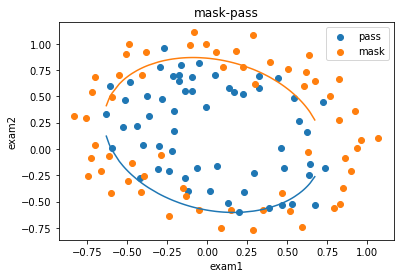

In [107]:
fig5 =plt.figure()
test1_pass,test2_pass = data.loc[:,'test1'][isPass],data.loc[:,'test2'][isPass]
test1_mask,test2_mask = data.loc[:,'test1'][~isPass],data.loc[:,'test2'][~isPass]
plt.title('mask-pass')
data_pass = plt.scatter(test1_pass,test2_pass)
data_mask = plt.scatter(test1_mask,test2_mask)
plt.xlabel('exam1')
plt.ylabel('exam2')
plt.legend((data_pass,data_mask),('pass','mask'))
plt.plot(x1_new,x2_new_boundary1)
plt.plot(x1_new,x2_new_boundary2)
plt.show()

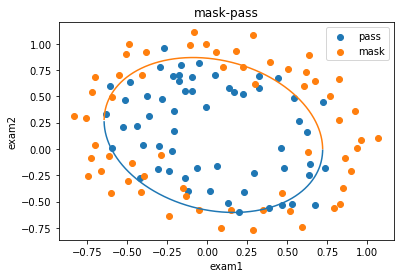

In [111]:
x1_range = [-0.9+x/10000 for x in range(0,19000)]
x1_range = np.array(x1_range)
x2_new_boundary1 = []
x2_new_boundary2 = []
for x in x1_range:
    x2_new_boundary1.append(f(x)[0])
    x2_new_boundary2.append(f(x)[1])

fig5 =plt.figure()
test1_pass,test2_pass = data.loc[:,'test1'][isPass],data.loc[:,'test2'][isPass]
test1_mask,test2_mask = data.loc[:,'test1'][~isPass],data.loc[:,'test2'][~isPass]
plt.title('mask-pass')
data_pass = plt.scatter(test1_pass,test2_pass)
data_mask = plt.scatter(test1_mask,test2_mask)
plt.xlabel('exam1')
plt.ylabel('exam2')
plt.legend((data_pass,data_mask),('pass','mask'))
plt.plot(x1_range,x2_new_boundary1)
plt.plot(x1_range,x2_new_boundary2)
plt.show()
